In [1]:
1+2

3

Use this notebook to get a sensitivity contour for ALPs.

In [2]:
# JSON is a format for data that is used for pyhf models
import json
# We also of course need pyhf
import pyhf
import numpy as np
import matplotlib.pyplot as plt

from pyanalib import panda_helpers
from unc_funcs import *
from unc_samples import *
from unc_MC_overhead import *


evtdf.shape before enforcing correct FV w/ uncontained track length: (1358211, 266)
evtdf.shape after enforcing correct FV w/ uncontained track length: (1324180, 266)


/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/e

In [4]:
# location for output of this notebook:

contour_dir = '/exp/icarus/data/users/jdyer/muon_selection/contours/'


## Results of My MC Event Selection

In [3]:
#event_sel_results_dir = '/exp/icarus/data/users/jdyer/muon_selection/result_dfs/all_cuts_2408/'
event_sel_results_dir = '/exp/icarus/data/users/jdyer/muon_selection/result_dfs/benchmarked_evtSel_241209/'
selected_evtdf = pd.read_pickle(event_sel_results_dir + 'final_evtdf')
res_pot = pd.read_pickle(event_sel_results_dir + 'res_pot')
res_mc = pd.read_pickle(event_sel_results_dir + 'res_mc')
res_pc = pd.read_pickle(event_sel_results_dir + 'res_percent')



In [4]:
cats = make_categories(selected_evtdf)
#for c in cats: 
#    print(c.name)
total_selected_bg = np.sum(selected_evtdf[cats[1]].scale) + np.sum(selected_evtdf[cats[2]].scale)
print('Total Number of Background Events expected to be selected for %a POT: ' % GOAL_POT, total_selected_bg )

Total Number of Background Events expected to be selected for 2.41e+20 POT:  1.6897722137839375


In [6]:
res_pot

,"$M_S$ = 220, $\theta_S$ = 1e-05","$M_S$ = 240, $\theta_S$ = 1e-05","$M_S$ = 260, $\theta_S$ = 1e-05","$M_S$ = 280, $\theta_S$ = 1e-05","$M_S$ = 300, $\theta_S$ = 1e-05","$M_S$ = 320, $\theta_S$ = 1e-05","$M_S$ = 340, $\theta_S$ = 1e-05","$M_S$ = 350, $\theta_S$ = 1e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'",$\nu$,Cosmic
preselection,0.01,0.06,0.17,0.26,0.30,0.33,0.22,0.15,0.0,0.0,0.0,0.0,0.01,0.03,0.38,0.06,0.03,0.02,26620.69,50180.67
below 0_5cm dEdx <= 50 MeV/cm,0.01,0.06,0.15,0.24,0.28,0.32,0.20,0.14,0.0,0.0,0.0,0.0,0.01,0.03,0.36,0.06,0.03,0.02,23041.18,46170.15
up to 1cm dEdx <= 35 MeV/cm,0.01,0.06,0.15,0.24,0.27,0.32,0.20,0.14,0.0,0.0,0.0,0.0,0.01,0.03,0.36,0.06,0.03,0.02,21363.36,44563.69
up to 2cm dEdx <= 15 MeV/cm,0.00,0.06,0.15,0.23,0.27,0.31,0.19,0.14,0.0,0.0,0.0,0.0,0.01,0.03,0.34,0.06,0.03,0.02,18062.51,40778.25
up to 3cmdEdx <= 10 MeV/cm,0.00,0.06,0.14,0.22,0.26,0.31,0.19,0.13,0.0,0.0,0.0,0.0,0.01,0.03,0.33,0.06,0.03,0.02,16143.06,38695.32
max shower len < 0.0 cm,0.00,0.05,0.13,0.20,0.23,0.25,0.17,0.12,0.0,0.0,0.0,0.0,0.00,0.02,0.28,0.05,0.02,0.02,9585.55,30635.68
both chi2mu < 13,0.00,0.04,0.10,0.15,0.17,0.19,0.12,0.09,0.0,0.0,0.0,0.0,0.00,0.02,0.18,0.03,0.01,0.01,4457.36,13245.99
both chi2p > 90,0.00,0.04,0.10,0.15,0.17,0.19,0.12,0.09,0.0,0.0,0.0,0.0,0.00,0.02,0.18,0.03,0.01,0.01,4221.15,12702.23
S_NuMI_angle < 3 deg,0.00,0.02,0.05,0.08,0.08,0.09,0.05,0.04,0.0,0.0,0.0,0.0,0.00,0.01,0.07,0.01,0.01,0.00,142.79,0.98
opening angle < 15 deg,0.00,0.02,0.03,0.03,0.03,0.04,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.04,0.00,0.00,0.00,7.17,0.00


In [7]:
res_mc

,"$M_S$ = 220, $\theta_S$ = 1e-05","$M_S$ = 240, $\theta_S$ = 1e-05","$M_S$ = 260, $\theta_S$ = 1e-05","$M_S$ = 280, $\theta_S$ = 1e-05","$M_S$ = 300, $\theta_S$ = 1e-05","$M_S$ = 320, $\theta_S$ = 1e-05","$M_S$ = 340, $\theta_S$ = 1e-05","$M_S$ = 350, $\theta_S$ = 1e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'",$\nu$,Cosmic
preselection,2808,6046,7890,5222,9127,184,13047,552,14570,17081,17825,19843,22275,24279,25919,25066,24932,24668,181065,300374
below 0_5cm dEdx <= 50 MeV/cm,2581,5586,7164,4777,8315,175,11916,504,13505,15850,16561,18437,20801,22533,24168,23170,23156,22977,157640,276610
up to 1cm dEdx <= 35 MeV/cm,2564,5569,7144,4765,8282,175,11858,503,13459,15800,16499,18368,20729,22459,24077,23082,23054,22890,147001,266993
up to 2cm dEdx <= 15 MeV/cm,2484,5412,6924,4638,8034,170,11541,496,13066,15306,16003,17828,20132,21779,23273,22381,22334,22200,125868,244354
up to 3cmdEdx <= 10 MeV/cm,2380,5212,6654,4469,7761,169,11174,479,12505,14753,15431,17166,19434,21062,22272,21649,21612,21571,113989,231978
max shower len < 0.0 cm,2013,4630,5938,3998,6971,137,9936,424,10686,12732,13429,14895,16885,18272,19130,18788,18737,18775,70084,183603
both chi2mu < 13,1536,3576,4619,3037,5277,102,7224,317,7642,8965,9529,10238,11431,12128,11983,12230,12153,12168,33757,79325
both chi2p > 90,1498,3524,4538,2993,5187,102,7113,315,7540,8853,9399,10100,11288,11969,11866,12111,12025,12029,32180,76116
S_NuMI_angle < 3 deg,691,1803,2432,1522,2525,50,3131,141,4377,4920,5089,4986,5324,5099,5064,4628,4205,3977,1406,83
opening angle < 15 deg,626,1399,1456,682,832,20,782,36,2671,2399,2374,1949,1911,1696,2690,1088,836,667,100,13


In [8]:
res_pc

,"$M_S$ = 220, $\theta_S$ = 1e-05","$M_S$ = 240, $\theta_S$ = 1e-05","$M_S$ = 260, $\theta_S$ = 1e-05","$M_S$ = 280, $\theta_S$ = 1e-05","$M_S$ = 300, $\theta_S$ = 1e-05","$M_S$ = 320, $\theta_S$ = 1e-05","$M_S$ = 340, $\theta_S$ = 1e-05","$M_S$ = 350, $\theta_S$ = 1e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'",$\nu$,Cosmic
preselection,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
below 0_5cm dEdx <= 50 MeV/cm,0.919160,0.923917,0.907985,0.914784,0.911033,0.951087,0.913313,0.913043,0.926905,0.927932,0.929088,0.929144,0.933827,0.928086,0.932443,0.924360,0.928766,0.931450,0.870627,0.920885
up to 1cm dEdx <= 35 MeV/cm,0.913105,0.921105,0.905450,0.912486,0.907418,0.951087,0.908868,0.911232,0.923747,0.925004,0.925610,0.925666,0.930595,0.925038,0.928932,0.920849,0.924675,0.927923,0.811869,0.888869
up to 2cm dEdx <= 15 MeV/cm,0.884615,0.895137,0.877567,0.888165,0.880245,0.923913,0.884571,0.898551,0.896774,0.896083,0.897784,0.898453,0.903793,0.897030,0.897913,0.892883,0.895797,0.899951,0.695154,0.813499
up to 3cmdEdx <= 10 MeV/cm,0.847578,0.862058,0.843346,0.855802,0.850334,0.918478,0.856442,0.867754,0.858270,0.863708,0.865694,0.865091,0.872458,0.867499,0.859292,0.863680,0.866838,0.874453,0.629547,0.772297
max shower len < 0.0 cm,0.716880,0.765796,0.752598,0.765607,0.763778,0.744565,0.761554,0.768116,0.733425,0.745390,0.753380,0.750643,0.758025,0.752585,0.738069,0.749541,0.751524,0.761108,0.387065,0.611248
both chi2mu < 13,0.547009,0.591465,0.585425,0.581578,0.578175,0.554348,0.553691,0.574275,0.524502,0.524852,0.534586,0.515950,0.513176,0.499526,0.462325,0.487912,0.487446,0.493271,0.186436,0.264087
both chi2p > 90,0.533476,0.582865,0.575158,0.573152,0.568314,0.554348,0.545183,0.570652,0.517502,0.518295,0.527293,0.508996,0.506756,0.492977,0.457811,0.483164,0.482312,0.487636,0.177726,0.253404
S_NuMI_angle < 3 deg,0.246083,0.298214,0.308238,0.291459,0.276652,0.271739,0.239979,0.255435,0.300412,0.288039,0.285498,0.251272,0.239012,0.210017,0.195378,0.184633,0.168659,0.161221,0.007765,0.000276
opening angle < 15 deg,0.222934,0.231393,0.184537,0.130601,0.091158,0.108696,0.059937,0.065217,0.183322,0.140448,0.133184,0.098221,0.085791,0.069855,0.103785,0.043405,0.033531,0.027039,0.000552,0.000043


## Number of Observed Data Events

(update this value when I look at data in signal box.)

In [5]:
observed_data_events = 2 # pretend for now.



## General tools for reweighting

In [9]:
#for m in higgs_masses: print(m)

cats = make_categories(selected_evtdf, detailed_bsm=True)
for c in cats: print(c.name)
    
selected_hps_300 = selected_evtdf[cats[4]]
selected_alps_mixProd_300 = selected_evtdf[cats[8]] 
print(cats[8].name)


$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 320, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_S$ = 350, $\theta_S$ = 1e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'
$\nu$
Cosmic
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'


In [24]:
## Check effect of dropping the K0L-produced ALPs (which is the correct thing to do.)

print(np.unique(selected_hps_300.slc.truth.parent_pdg)) # 130 K0L, 310 K0S, 311 K0, (-)321 K(-)+

print(selected_evtdf[cats[0]].shape)
test = selected_evtdf[cats[0]][np.abs(selected_evtdf[cats[0]].slc.truth.parent_pdg) == 321]
print(test.shape)
print('')

mc_sum_wK0 = sum([selected_evtdf[c].shape[0] for c in cats[:8]])
mc_sum_woK0 = sum([ selected_evtdf[c][np.abs(selected_evtdf[c].slc.truth.parent_pdg) == 321].shape[0] for c in cats[:8] ])
print(mc_sum_wK0)
print(mc_sum_woK0)
print("Statistical hit when you drop the K0L's: ", 1-(mc_sum_woK0/mc_sum_wK0))

pot_sum_wK0 = sum( [sum(selected_evtdf[c].scale) for c in cats[:8]])
pot_sum_woK0 = sum([ sum(selected_evtdf[c][np.abs(selected_evtdf[c].slc.truth.parent_pdg) == 321].scale) for c in cats[:8] ])
print(pot_sum_wK0)
print(pot_sum_woK0)
print("POT-norm'ed hit when you drop the K0L's: ", 1-(pot_sum_woK0/pot_sum_wK0))

print(np.unique(selected_evtdf[np.abs(selected_evtdf.slc.truth.parent_pdg) == 321].slc.truth.parent_pdg)) # 130 K0L, 310 K0S, 311 K0, (-)321 K(-)+


[-321  130  321]
(302, 284)
(211, 284)

3226
2103
Statistical hit when you drop the K0L's:  0.34810911345319284
0.10270178215883952
0.05746425128920857
POT-norm'ed hit when you drop the K0L's:  0.4404746433675919
[-321  321]


In [15]:
# Sanity checks: Verify that "allowed_decay_fraction" in dataframes consistent with what I get from functions in unc_funcs.py
# Result: I think so, within rounding.

# Update 1/10/125: It is not for scalars that can decay into pions!!! 
# But I don't THINK this is a problem....? I think I checked this originally just cause I used them for reweighting the axions.
# But wait, hmm, it is different for ALPs too... wtf.

# Resolution 1/14/25: 
# allowed_decay_fraction is the a->uu branching fraction for alps, so use that. 
# allowed_decay_fraction is NOT the S->uu branching fraction for HPS. Instead calculate that myself.

cats = make_categories(evtdf, detailed_bsm=True)

print('\nHPS\n')
print(cats[0].name)
print(np.unique(higgs_mcdfs[0].allowed_decay_fraction), 
      HPS_MuonPartialWidth(float(higgs_mcdfs[0].iloc[[0]].M), float(higgs_mcdfs[0].iloc[[0]].C1))/HPS_total_decay_Width(float(higgs_mcdfs[0].iloc[[0]].M), float(higgs_mcdfs[0].iloc[[0]].C1)), 
      sep=', ') 
print(cats[5].name)
print(np.unique(higgs_mcdfs[5].allowed_decay_fraction),
    HPS_MuonPartialWidth(float(higgs_mcdfs[5].iloc[[0]].M), float(higgs_mcdfs[5].iloc[[0]].C1))/HPS_total_decay_Width(float(higgs_mcdfs[5].iloc[[0]].M), float(higgs_mcdfs[5].iloc[[0]].C1)), 
      sep=', ') 
print('\nALPS\n')
for i in range(len(alp_nosup_masses)):
    mass = float(alp_nosup_mcdfs[i].iloc[[0]].M)
    if mass > 0.4: break
    print(cats[i+len(higgs_masses)].name)
    fa = float(alp_nosup_mcdfs[i].iloc[[0]].C1)
    cAu = float(alp_nosup_mcdfs[i].iloc[[0]].C2)
    print(np.unique(alp_nosup_mcdfs[i].allowed_decay_fraction), 
          ALP_uu_width(mass, fa, cAu)/ALP_total_decay_Width(mass, fa, cAu, 1,1,1), 
          sep=', ') 
# Note: drop around eta mass makes sense b/c coupling to gammas has a pole at the eta mass.
# Note: my comparison SHOULD break down for the ALPs above 400 MeV where decay to pions matters. 


HPS

$M_S$ = 220, $\theta_S$ = 1e-05
[1.], 0.9989145833498929
$M_S$ = 320, $\theta_S$ = 1e-05
[1.], 0.23100864370292865

ALPS

$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'
[0.988255], 0.9892376047780471
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'
[0.99271123], 0.9936221126323607
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'
[0.99402028], 0.9948763839275324
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'
[0.99963594], 0.9999816835463075


In [6]:
# I need to reference the actual events that were selected for each mass point.
# Make some dictionaries to map between generated ALPs and generated HPSs:

mass_to_hpsSampleIndex = dict(zip(np.array(higgs_masses)/1000., range(len(higgs_masses)))) # evtdf or mchdf

mass_to_alpSampleIndex = dict(zip(np.array(alp_nosup_masses)/1000., # evtdf
                                  np.array(range(len(alp_nosup_masses)))+np.array([len(higgs_masses)]*len(alp_nosup_masses)) 
                                 )
                             )
mass_to_alp_mcdf_SampleIndex = dict(zip(np.array(alp_nosup_masses)/1000., range(len(alp_nosup_masses)))) # mchdf


In [10]:
print(higgs_masses)
mass_to_hpsSampleIndex[220]


[220, 240, 260, 280, 300, 320, 340, 350]


0

In [9]:
mass_to_hpsSampleIndex = dict(zip(higgs_masses, range(len(higgs_masses))))
mass_to_hpsSampleIndex

{220: 0, 240: 1, 260: 2, 280: 3, 300: 4, 320: 5, 340: 6, 350: 7}

In [12]:
mass_to_alpSampleIndex

{0.3: 8,
 0.34: 9,
 0.35: 10,
 0.4: 11,
 0.45: 12,
 0.5: 13,
 0.54: 14,
 0.6: 15,
 0.65: 16,
 0.7: 17}

In [35]:
mass_to_alp_mcdf_SampleIndex

{0.3: 0,
 0.34: 1,
 0.35: 2,
 0.4: 3,
 0.45: 4,
 0.5: 5,
 0.54: 6,
 0.6: 7,
 0.65: 8,
 0.7: 9}

In [35]:
def expected_alp_events(mass, new_fa, new_cl, print_stuff=False, do_P0prod=True, do_Kprod=True): # input mass in GeV
    ## This function 
    
    #print('mass (should be in GeV): ', mass)
    #print('new_fa: ', new_fa)
    #print('new_cl: ', new_cl)
    #mass = mass/1000. # convert from MeV to GeV
    categories = make_categories(selected_evtdf, detailed_bsm=True)
    
    # REWEIGHT FROM MESON-MIXING-PRODUCED ALPs: 
    if do_P0prod:
        if mass in mass_to_alpSampleIndex.keys():
            i_alp = mass_to_alpSampleIndex[mass]
            #print('i_alp: ', i_alp)
            df_alp = selected_evtdf[categories[i_alp]]
    
            i_alp_mcdf = mass_to_alp_mcdf_SampleIndex[mass]
            #print('i_alp_mcdf: ', i_alp_mcdf)
            old_fa = float(alp_nosup_mcdfs[i_alp_mcdf].iloc[[0]].C1)
            #print('old_fa: ', old_fa)
            old_cmu = float(alp_nosup_mcdfs[i_alp_mcdf].iloc[[0]].C2)
            #print('old_cmu: ', old_cmu)
        
            old_alp_f = float(alp_nosup_mcdfs[i_alp_mcdf].iloc[0].allowed_decay_fraction)
        
            #print('reference mass: ', float(alp_nosup_mcdfs[i_alp_mcdf].iloc[[0]].M))
    
            reweigts_psuedomixed_alps = []
            for idx in df_alp.index:
                row = alp_nosup_mcdfs[i_alp_mcdf].loc[(idx[1],idx[2], 0)]
        
                factor_rwgt_producedAlps = float(
                    reweight_alps(old_fa, new_fa, old_cmu, new_cl, 
                                  row.start, row.enter, row.exit, 
                                  row.decay_length, old_alp_f)
                )
                #print('mixed reweights: \n', factor_rwgt_producedAlps)

                reweigts_psuedomixed_alps.append(factor_rwgt_producedAlps)
            alps_from_mixing = sum(np.array(df_alp.scale)*np.array(reweigts_psuedomixed_alps))
        else: 
            print('We cannot perform a reweighting from ALPs -> ALPs for that mass, because we did not generate meson-mixing-produced ALPs for that mass.')
            #alp_f = ALP_uu_width(mass, new_fa, new_cl)/ALP_total_decay_Width(mass, new_fa, new_cl, 1,1,1)
            alps_from_mixing = -1.
    else: alps_from_mixing = -2.
        
    # REWEIGHT FROM KAON-DECAY-PRODUCED ALPs:
    if do_Kprod:
        if mass < klong_mass-pizero_mass:
            if mass in mass_to_hpsSampleIndex.keys():
                i_hps = mass_to_hpsSampleIndex[mass]
                #print('i_hps: ', i_hps)
                df_hps = selected_evtdf[categories[i_hps]]
                df_hps = df_hps[np.abs(df_hps.slc.truth.parent_pdg == 321)] ## Mask out the ones with K0_L parent since that is CP-violating-suppressed for ALPs.
                #print('These need to match: ', mass, ', ', higgs_mcdfs[i_hps].iloc[[0]].M)
                old_theta = float(higgs_mcdfs[i_hps].iloc[[0]].C1)
            
                #hps_f = float(higgs_mcdfs[i_hps].iloc[0].allowed_decay_fraction)
                #alp_f = ALP_uu_width(mass, new_fa, new_cl)/ALP_total_decay_Width(mass, new_fa, new_cl, 1,1,1)
                # 1/14/25. Above two lines are wrong. Below lines are correct (fixed today).
                hps_f = float( HPS_MuonPartialWidth( float(higgs_mcdfs[i_hps].iloc[[0]].M), float(higgs_mcdfs[i_hps].iloc[[0]].C1))/
                              HPS_total_decay_Width(float(higgs_mcdfs[i_hps].iloc[[0]].M), float(higgs_mcdfs[i_hps].iloc[[0]].C1)), 
                             )
                if mass in mass_to_alpSampleIndex.keys():  
                    i_alp_mcdf = mass_to_alp_mcdf_SampleIndex[mass]
                    alp_f = float(alp_nosup_mcdfs[i_alp_mcdf].iloc[0].allowed_decay_fraction)
                else:
                    total_a_to_uu = ALP_total_decay_Width(mass, new_fa, new_cl, 1,1,1)
                    assert total_a_to_uu != -1
                    alp_f =ALP_uu_width(mass, new_fa, new_cl)/ALP_total_decay_Width(mass, new_fa, new_cl, 1,1,1)
            
                reweigts_kdecay_alps = []
                for idx in df_hps.index:
                    row = higgs_mcdfs[i_hps].loc[(idx[1],idx[2], 0)]
                    hps_mean_dist = row.decay_length
        
                    factor_rwgt_hps = float(
                        reweight_hps_to_alps(
                            mass, old_theta, hps_mean_dist, hps_f, 
                            new_fa, new_cl, alp_f,
                            row.start, row.enter, row.exit, int(df_hps.loc[idx].slc.truth.parent_pdg)
                        )
                    )
                    reweigts_kdecay_alps.append(factor_rwgt_hps)
                alps_from_kdecay = sum(np.array(df_hps.scale)*np.array(reweigts_kdecay_alps))
        
            else:
                print('input mass: %a' % mass, klong_mass-pizero_mass)
                print('Production via kaon decay IS possible, but we did not generate HPSs at the desired alp mass, so we cannot perform the needed rescaling.' )
                alps_from_kdecay = -1.
        else:
            #print('The axion is too heavy to be produced via Kaon decay.')
            alps_from_kdecay = 0.
    else: alps_from_kdecay = -2.
                  
    # Combine both Production Modes and return results:
    
    if (alps_from_mixing == -1.) | (alps_from_kdecay == -1.):
        alps_from_both = -1.
    elif (alps_from_mixing == -2.) | (alps_from_kdecay == -2.):
        alps_from_both = -2.
    else:
        alps_from_both = alps_from_mixing + alps_from_kdecay
                  
    return(alps_from_mixing, alps_from_kdecay, alps_from_both)


In [28]:
# Sanity check: Make sure my function works.

print("Number of POT-norm'ed selected 300 MeV Higgs: ", sum(np.array(selected_hps_300.scale)))
print("Number of POT-norm'ed selected meson-mixing-generated 300 MeV ALPs: ", 
      sum(np.array(selected_alps_mixProd_300.scale)))
fa = alp_nosup_fa[0]
cl = alp_nosup_cAl[0]
mass = 0.3
#print(fa, cl, sep=', ')
print("SANITY CHECK: What my func says the number of POT-norm'ed selected meson-mixing-generated 300 MeV ALPs is, given the selected 300 MeV HPS as input: ",
      expected_alp_events(mass, fa, cl)[0], "(This number should be equal to the one above.)")
print("Number of POT-norm'ed selected K-decay-generated 300 MeV ALPs selected: ", 
      expected_alp_events(mass, fa, cl)[1] )

# selected_alps_mixProd_300 = selected_evtdf[cats[6]] # just use the higher stats one rn (fa = 1e5)


Number of POT-norm'ed selected 300 MeV Higgs:  0.016373541899725435
Number of POT-norm'ed selected meson-mixing-generated 300 MeV ALPs:  9.931969033414924e-05
SANITY CHECK: What my func says the number of POT-norm'ed selected meson-mixing-generated 300 MeV ALPs is, given the selected 300 MeV HPS as input:  9.931969033414924e-05 (This number should be equal to the one above.)
Number of POT-norm'ed selected K-decay-generated 300 MeV ALPs selected:  0.002409930634974549


# Running Coupling Between c_mu and f_a.

### Existing Limits

In [14]:
# little test:
x = np.array([1,2])
y = np.concatenate((x, np.flip(x)))
print(y)


[1 2 2 1]


In [53]:
# convention: y = 1/fa
# save masses in GeV

# -----

# CODOMINANCE, RUNNING COUPLING for c_mu

otherLims_runningCmu_dir = '/exp/icarus/data/users/jdyer/muon_selection/other_limits/alps/'

# ICARUS Contained search
masses_lowlim = [] # save it as MeV
inv_fa_lowlim = []
with open(otherLims_runningCmu_dir+'Grays_obsLimit_CD_uurun_lowfa', 'r') as file:
    for line in file:
        a, b = line.strip().split(', ')
        masses_lowlim.append(float(a))
        inv_fa_lowlim.append(float(b))
masses_hilim = [] # save it as MeV
inv_fa_hilim = []
with open(otherLims_runningCmu_dir+'Grays_obsLimit_CD_uurun_hifa', 'r') as file:
    for line in file:
        a, b = line.strip().split(', ')
        masses_hilim.append(float(a))
        inv_fa_hilim.append(float(b))

Gray_x = np.concatenate(( np.array(masses_lowlim), np.flip(np.array(masses_hilim)) ))
Gray_y = np.concatenate(( np.array(inv_fa_lowlim), np.flip(np.array(inv_fa_hilim)) ))

# CHARM gg - from Kaons
masses = [] # save it as MeV
fa_max = []
fa_min = []
with open(otherLims_runningCmu_dir+'limits_CHARM_CHARM_gg_CD_N4.txt', 'r') as file:
    for line in file:
        if '#' in line: 
            continue
        else:
            a, b, c = line.strip().split('\t')
            masses.append(float(a))
            fa_max.append(float(b))
            fa_min.append(float(c))
charm_gg_x = np.concatenate(( np.array(masses), np.flip(np.array(masses)) ))
charm_gg_y = 1./np.concatenate(( np.array(fa_max), np.flip(np.array(fa_min)) )) # 1/fa
charm_gg_x = charm_gg_x[np.isfinite(charm_gg_y)]
charm_gg_y = charm_gg_y[np.isfinite(charm_gg_y)]

# CHARM uu - from Kaons
masses = [] # save it as MeV
fa_max = []
fa_min = []
with open(otherLims_runningCmu_dir+'limits_CHARM_CHARM_uurun_CD_N2.txt', 'r') as file:
    for line in file:
        if '#' in line: 
            continue
        else:
            a, b, c = line.strip().split('\t')
            masses.append(float(a))
            fa_max.append(float(c))
            fa_min.append(float(b))
charm_uu_x = np.concatenate(( np.array(masses), np.flip(np.array(masses)) ))
charm_uu_y = 1./np.concatenate(( np.array(fa_max), np.flip(np.array(fa_min)) )) # 1/fa
charm_uu_x = charm_uu_x[np.isfinite(charm_uu_y)]
charm_uu_y = charm_uu_y[np.isfinite(charm_uu_y)]

# CHARM gg - from psuedoscalars
masses = [] # save it as MeV
fa_max = []
fa_min = []
with open(otherLims_runningCmu_dir+'limits_CHARM_CHARMP0_gg_CD_N4.txt', 'r') as file:
    for line in file:
        if '#' in line: 
            continue
        else:
            a, b, c = line.strip().split('\t')
            masses.append(float(a))
            fa_max.append(float(b))
            fa_min.append(float(c))
charmP0_gg_x = np.concatenate(( np.array(masses), np.flip(np.array(masses)) ))
charmP0_gg_y = 1./np.concatenate(( np.array(fa_max), np.flip(np.array(fa_min)) )) # 1/fa
charmP0_gg_x = charmP0_gg_x[np.isfinite(charmP0_gg_y)]
charmP0_gg_y = charmP0_gg_y[np.isfinite(charmP0_gg_y)]
# enable not connecting the upper and lower limits:
charmP0_gg_x_1 = np.array(masses)
charmP0_gg_y_1 = 1./np.array(fa_max)
charmP0_gg_x_1 = charmP0_gg_x_1[np.isfinite(charmP0_gg_y_1)]
charmP0_gg_y_1 = charmP0_gg_y_1[np.isfinite(charmP0_gg_y_1)]
charmP0_gg_x_2 = np.array(masses)
charmP0_gg_y_2 = 1./np.array(fa_min)
charmP0_gg_x_2 = charmP0_gg_x_2[np.isfinite(charmP0_gg_y_2)]
charmP0_gg_y_2 = charmP0_gg_y_2[np.isfinite(charmP0_gg_y_2)]

# CHARM uu - from psuedoscalars
masses = [] # save it as MeV
fa_max = []
fa_min = []
with open(otherLims_runningCmu_dir+'limits_CHARM_CHARMP0_uurun_CD_N2.txt', 'r') as file:
    for line in file:
        if '#' in line: 
            continue
        else:
            a, b, c = line.strip().split('\t')
            masses.append(float(a))
            fa_max.append(float(c))
            fa_min.append(float(b))
charmP0_uu_x = np.concatenate(( np.array(masses), np.flip(np.array(masses)) ))
charmP0_uu_y = 1./np.concatenate(( np.array(fa_max), np.flip(np.array(fa_min)) )) # 1/fa
charmP0_uu_x = charmP0_uu_x[np.isfinite(charmP0_uu_y)]
charmP0_uu_y = charmP0_uu_y[np.isfinite(charmP0_uu_y)]
# enable not connecting the upper and lower limits:
charmP0_uu_x_1 = np.array(masses)
charmP0_uu_y_1 = 1./np.array(fa_max)
charmP0_uu_x_1 = charmP0_uu_x_1[np.isfinite(charmP0_uu_y_1)]
charmP0_uu_y_1 = charmP0_uu_y_1[np.isfinite(charmP0_uu_y_1)]
charmP0_uu_x_2 = np.array(masses)
charmP0_uu_y_2 = 1./np.array(fa_min)
charmP0_uu_x_2 = charmP0_uu_x_2[np.isfinite(charmP0_uu_y_2)]
charmP0_uu_y_2 = charmP0_uu_y_2[np.isfinite(charmP0_uu_y_2)]

# NA62
# Red in Figure 9 right panel here: https://arxiv.org/pdf/2103.15389
# This is an alp-interpretation of same data for HPS.
masses = [] # save it as MeV
inv_fa_max = []
inv_fa_min = []
with open(otherLims_runningCmu_dir+'NA62_bound_CD_cuu0_mhi.txt', 'r') as file:
    for line in file:
        a, b, c = line.strip().split('\t')
        masses.append(float(a))
        inv_fa_max.append(float(c))
        inv_fa_min.append(float(b))
NA62_x = np.concatenate(( np.array(masses), np.flip(np.array(masses)) ))
NA62_y = np.concatenate(( np.array(inv_fa_min), np.flip(np.array(inv_fa_max)) )) # 1/fa

# uB
masses = [] # save it as MeV
fa_max = []
fa_min = []
with open(otherLims_runningCmu_dir+'uBsensitivity_ALP_CD.txt', 'r') as file:
    for line in file:
        if '#' in line: 
            continue
        else:
            a, b, c = line.strip().split('\t')
            masses.append(float(a))
            fa_max.append(float(b))
            fa_min.append(float(c))
uB_x = np.concatenate(( np.array(masses), np.flip(np.array(masses)) ))
uB_y = 1./np.concatenate(( np.array(fa_max), np.flip(np.array(fa_min)) )) # 1/fa


/tmp/ipykernel_1715608/3234443728.py:43: RuntimeWarning: divide by zero encountered in divide
  charm_gg_y = 1./np.concatenate(( np.array(fa_max), np.flip(np.array(fa_min)) )) # 1/fa
/tmp/ipykernel_1715608/3234443728.py:61: RuntimeWarning: divide by zero encountered in divide
  charm_uu_y = 1./np.concatenate(( np.array(fa_max), np.flip(np.array(fa_min)) )) # 1/fa
/tmp/ipykernel_1715608/3234443728.py:79: RuntimeWarning: divide by zero encountered in divide
  charmP0_gg_y = 1./np.concatenate(( np.array(fa_max), np.flip(np.array(fa_min)) )) # 1/fa
/tmp/ipykernel_1715608/3234443728.py:84: RuntimeWarning: divide by zero encountered in divide
  charmP0_gg_y_1 = 1./np.array(fa_max)
/tmp/ipykernel_1715608/3234443728.py:88: RuntimeWarning: divide by zero encountered in divide
  charmP0_gg_y_2 = 1./np.array(fa_min)


### Expected Rates given model params and event selection performance (Just Physics!)

In [23]:
print(klong_mass-pizero_mass)


0.3626342
[300, 350, 400, 450, 500, 340, 540, 600, 650, 700]
[300, 350, 400, 450, 500]


In [20]:
print(higgs_masses)
print(GOAL_POT)
print(POTSTR)
print(contour_dir+'alp_running_cu/'+filename)
print(contour_dir+'alp_running_cu/')

[220, 240, 260, 280, 300, 320, 340, 350]
2.41e+20
2.41e20 POT
/exp/icarus/data/users/jdyer/muon_selection/contours/alp_running_cu/alps_selRate_grid
/exp/icarus/data/users/jdyer/muon_selection/contours/alp_running_cu/


In [16]:
print(higgs_masses)
print(alp_nosup_masses)

[220, 240, 260, 280, 300, 320, 340, 350]
[300, 340, 350, 400, 450, 500, 540, 600, 650, 700]


In [36]:
# Get the input parameters for my fa vs. mass grid.
# Need to read in the fa:c_mu pairs for the running coupling.

# This cell uses the mixing-produced ALP masses for the grid.

filename = 'alps_selRate_grid' # selRate = selection rate.

running_cmu_codominance_file = '/exp/icarus/data/users/jdyer/muon_selection/tabulated_running_alp_cmu_vals_fromJosh/cl_c3_1_c12_1.csv' 
Y = [] # fa values
fa_strings = []
param_pair_strings = []
fa_and_running_cmu_pairs_codominance = []

with open(running_cmu_codominance_file, 'r') as file:
    for line in file: 
        fa, cl = line.strip().split(',')
        fa_and_running_cmu_pairs_codominance.append( (float(fa), float(cl)) )
        Y.append(float(fa))
        fa_strings.append('fa='+str(fa))
        param_pair_strings.append('1/f_a='+str(1./float(fa))+', c_mu='+str(cl))
        #running_cmu_codominance.append(float(cl))
        
# GET Z VALUES FOR THE GRID, FOR MIXING-GENERATED ALP MASSES

X = np.array(alp_nosup_masses).astype(np.float)/1000. # alp masses to scan over, in GeV
print(X)

## Calculate the expected event rates for the grid, and save:
#Z = [expected_alp_events(m, pair[0], pair[1], do_Kprod=False) for pair in fa_and_running_cmu_pairs_codominance for m in X]
#Z = np.array(Z)
#np.save(contour_dir+'alp_running_cu/'+filename+'_fromP0', Z)

# Read in pre-saved expected event rates for the grid:
print(contour_dir+'alp_running_cu/'+filename+'_fromP0.npy')
Z = np.load(contour_dir+'alp_running_cu/'+filename+'_fromP0.npy')

Z_inds = np.arange(len(Z))
Z_outputs_per_mass = []
Z_mixProd = []
Z_KdecayProd = []
Z_bothProd = []
for nm in range(len(X)):
    Z_of_this_mass = Z[ np.where(Z_inds%len(X) == nm) ]
    Z_outputs_per_mass.append( Z_of_this_mass )
    Z_mixProd.append(Z_of_this_mass[:,0])
    Z_KdecayProd.append(Z_of_this_mass[:,1])
    Z_bothProd.append(Z_of_this_mass[:,2])
Z_mixProd = np.transpose( np.array(Z_mixProd) )
Z_KdecayProd = np.transpose( np.array(Z_KdecayProd) )
Z_bothProd = np.transpose( np.array(Z_bothProd) )

# REPEAT USING THE SELECTED HPSs:

XfromHPS = np.array(higgs_masses).astype(np.float)/1000. # alp masses to scan over, in GeV

## Calculate the expected event rates for the grid, and save:
#ZfromHPS = [expected_alp_events(m, pair[0], pair[1], do_P0prod=False) for pair in fa_and_running_cmu_pairs_codominance for m in XfromHPS]
#ZfromHPS = np.array(ZfromHPS)
#np.save(contour_dir+'alp_running_cu/'+filename+'_fromHPS', ZfromHPS)

# Read in pre-saved expected event rates for the grid:
print(contour_dir+'alp_running_cu/'+filename+'_fromHPS.npy')
ZfromHPS = np.load(contour_dir+'alp_running_cu/'+filename+'_fromHPS.npy')

Z_inds_fromHPS = np.arange(len(ZfromHPS))
Z_outputs_per_mass_fromHPS = []
Z_mixProd_fromHPS = []
Z_KdecayProd_fromHPS = []
Z_bothProd_fromHPS = []
for nm in range(len(XfromHPS)):
    Z_of_this_mass = ZfromHPS[ np.where(Z_inds_fromHPS%len(XfromHPS) == nm) ]
    Z_outputs_per_mass_fromHPS.append( Z_of_this_mass )
    Z_mixProd_fromHPS.append(Z_of_this_mass[:,0])
    Z_KdecayProd_fromHPS.append(Z_of_this_mass[:,1])
    Z_bothProd_fromHPS.append(Z_of_this_mass[:,2])
Z_mixProd_fromHPS = np.transpose( np.array(Z_mixProd_fromHPS) )
Z_KdecayProd_fromHPS = np.transpose( np.array(Z_KdecayProd_fromHPS) )
Z_bothProd_fromHPS = np.transpose( np.array(Z_bothProd_fromHPS) )

/tmp/ipykernel_1715608/2687742873.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(alp_nosup_masses).astype(np.float)/1000. # alp masses to scan over, in GeV
/tmp/ipykernel_1715608/2687742873.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XfromHPS = np.array(higgs_masses).astype(np.float)/1000. # alp masses to scan 

[0.3  0.34 0.35 0.4  0.45 0.5  0.54 0.6  0.65 0.7 ]
/exp/icarus/data/users/jdyer/muon_selection/contours/alp_running_cu/alps_selRate_grid_fromP0.npy
/exp/icarus/data/users/jdyer/muon_selection/contours/alp_running_cu/alps_selRate_grid_fromHPS.npy


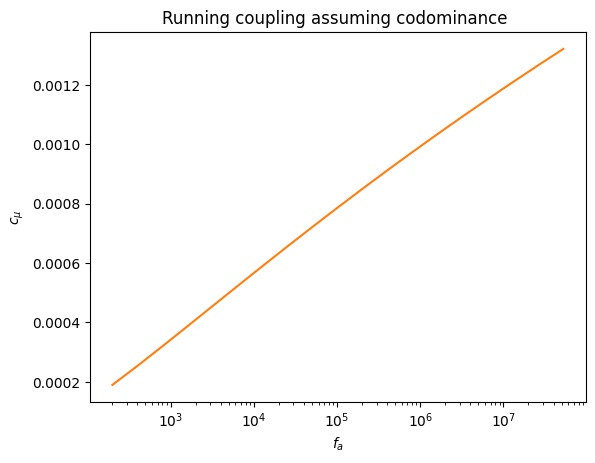

In [92]:
# Peak at the running couplings

xx = []
yy = []
for pair in fa_and_running_cmu_pairs_codominance:
    xx.append(pair[0])
    yy.append(pair[1])
#plt.plot(1./np.array(xx), yy)
plt.plot(xx, yy, color='C1')
plt.title('Running coupling assuming codominance ')
#plt.xlabel('1/$f_a$')
plt.xlabel('$f_a$')
plt.xscale('log')
plt.ylabel('$c_\mu$')
plt.show()

### Look at some tables that show the selected event rates for the different production modes, by mass.

In [52]:
# 300 MeV Event Rates

mass_ind = 0
print(alp_nosup_masses[mass_ind], ' MeV ALPs:')

alp_selected_rates_300MeV = pd.DataFrame(
    np.zeros((0,len(fa_strings)), dtype=int), # start w/ zero rows (cuts), fill later
    columns = fa_strings
)
alp_selected_rates_300MeV.loc["1/fa"] = 1./np.array(Y)
alp_selected_rates_300MeV.loc["Prod. via K-decay"] = Z_KdecayProd[:,mass_ind]
alp_selected_rates_300MeV.loc["Prod. via mixing"] = Z_mixProd[:,mass_ind]
alp_selected_rates_300MeV.loc["Prod. via both"] = Z_bothProd[:,mass_ind]
alp_selected_rates_300MeV.T


300  MeV ALPs:


,1/fa,Prod. via K-decay,Prod. via mixing,Prod. via both
fa=200,5.000000e-03,1.813514e-114,-1.0,-1.0
fa=400,2.500000e-03,3.064897e-26,-1.0,-1.0
fa=800,1.250000e-03,1.231861e-04,-1.0,-1.0
fa=1600,6.250000e-04,9.943625e+00,-1.0,-1.0
fa=3200,3.125000e-04,1.547574e+02,-1.0,-1.0
fa=6400,1.562500e-04,2.445365e+02,-1.0,-1.0
fa=12800,7.812500e-05,5.198976e+01,-1.0,-1.0
fa=25600,3.906250e-05,5.243380e+00,-1.0,-1.0
fa=51200,1.953125e-05,4.247505e-01,-1.0,-1.0
fa=102400,9.765625e-06,3.208049e-02,-1.0,-1.0


In [38]:
# 300 MeV Event Rates - percent-wise comparison of production modes:

mass_ind = 0
print(alp_nosup_masses[mass_ind], ' MeV ALPs:')

alp_selected_rates_300MeV = pd.DataFrame(
    np.zeros((0,len(fa_strings)), dtype=int), # start w/ zero rows (cuts), fill later
    columns = fa_strings
)
alp_selected_rates_300MeV.loc["1/fa"] = 1./np.array(Y)
alp_selected_rates_300MeV.loc["Prod. via K-decay"] = Z_KdecayProd[:,mass_ind]/Z_bothProd[:,mass_ind]
alp_selected_rates_300MeV.loc["Prod. via mixing"] = Z_mixProd[:,mass_ind]/Z_bothProd[:,mass_ind]
alp_selected_rates_300MeV.loc["Prod. via both"] = Z_bothProd[:,mass_ind]/Z_bothProd[:,mass_ind]
alp_selected_rates_300MeV.T

# Question to answer: What's with the sharp turnover around fa = 1000?

300  MeV ALPs:


,1/fa,Prod. via K-decay,Prod. via mixing,Prod. via both
fa=200,5.000000e-03,4.852600e-136,1.000000,1.0
fa=400,2.500000e-03,2.455916e-33,1.000000,1.0
fa=800,1.250000e-03,9.765390e-07,0.999999,1.0
fa=1600,6.250000e-04,8.757296e-01,0.124270,1.0
fa=3200,3.125000e-04,9.899003e-01,0.010100,1.0
fa=6400,1.562500e-04,9.908410e-01,0.009159,1.0
fa=12800,7.812500e-05,9.897526e-01,0.010247,1.0
fa=25600,3.906250e-05,9.882434e-01,0.011757,1.0
fa=51200,1.953125e-05,9.866614e-01,0.013339,1.0
fa=102400,9.765625e-06,9.851130e-01,0.014887,1.0


In [28]:
# 350 MeV Event Rates

alp_selected_rates_350MeV = pd.DataFrame(
    np.zeros((0,len(fa_strings)), dtype=int), # start w/ zero rows (cuts), fill later
    columns = fa_strings
)
alp_selected_rates_300MeV.loc["1/fa"] = 1./np.array(Y)
alp_selected_rates_300MeV.loc["Prod. via K-decay"] = Z_KdecayProd[:,1]
alp_selected_rates_300MeV.loc["Prod. via mixing"] = Z_mixProd[:,1]
alp_selected_rates_300MeV.loc["Prod. via both"] = Z_bothProd[:,1]
alp_selected_rates_300MeV.T

# NOTE: (12/10/24)
# I have flags here for the kaon-decay production mode because I don't have HPS samples with mS = 350 MeV.
# Best solution: Regenerate at a mass common to both production channels.
# Best temporary workaround: Interpolate Z_KdecayProd[:,1] from the other rates calculated for HPS->ALP.
# Super expedient workaround: Ignore this mass point for now.
# Alternate approach: ignore mixing-production mode when subdominant.


,1/fa,Prod. via K-decay,Prod. via mixing,Prod. via both
fa=200,5.000000e-03,-1.0,4.570713e-72,-1.0
fa=400,2.500000e-03,-1.0,3.380460e-17,-1.0
fa=800,1.250000e-03,-1.0,1.457936e-03,-1.0
fa=1600,6.250000e-04,-1.0,3.553532e+00,-1.0
fa=3200,3.125000e-04,-1.0,9.064295e+01,-1.0
fa=6400,1.562500e-04,-1.0,7.906656e+01,-1.0
fa=12800,7.812500e-05,-1.0,1.332657e+01,-1.0
fa=25600,3.906250e-05,-1.0,1.276640e+00,-1.0
fa=51200,1.953125e-05,-1.0,1.024053e-01,-1.0
fa=102400,9.765625e-06,-1.0,7.722261e-03,-1.0


### Make some contours w/ event counts.

In [73]:
higgs_masses

[220, 240, 260, 280, 300, 340]

In [17]:
print(charm_uu_y)

[2.53073258e-05 2.30208465e-05 2.17758219e-05 2.09444551e-05
 2.03157135e-05 1.98740260e-05 1.94389631e-05 1.91148794e-05
 1.88144956e-05 1.85783602e-05 1.84075622e-05 1.82094332e-05
 1.80593383e-05 1.79161085e-05 1.78284475e-05 1.77010999e-05
 1.75612590e-05 1.74460923e-05 1.73350878e-05 1.72966820e-05
 1.72854474e-05 1.72274045e-05 1.71612773e-05 1.71180016e-05
 1.70749711e-05 1.70470019e-05 1.70184569e-05 1.69598346e-05
 1.68946954e-05 1.69227934e-05 1.68608285e-05 1.68902546e-05
 1.68245913e-05 1.68651907e-05 1.68237506e-05 1.69114210e-05
 1.69398699e-05 1.69287842e-05 1.69021310e-05 1.68928718e-05
 1.68683677e-05 1.69146220e-05 1.69509417e-05 1.69825414e-05
 1.69996547e-05 1.69829001e-05 1.70677915e-05 1.70726717e-05
 1.70648006e-05 1.70852839e-05 1.70830801e-05 1.71008908e-05
 1.71614132e-05 1.72443764e-05 1.74011260e-05 1.74962753e-05
 1.76227519e-05 1.77031572e-05 1.77650359e-05 1.79626955e-05
 1.83067710e-05 1.83374596e-05 1.84297012e-05 1.86530842e-05
 1.89790329e-05 1.909110

In [18]:
print(charmP0_uu_y)

[2.53073258e-05 2.30208465e-05 2.17758219e-05 2.09444551e-05
 2.03157135e-05 1.98740260e-05 1.94389631e-05 1.91148794e-05
 1.88144956e-05 1.85783602e-05 1.84075622e-05 1.82094332e-05
 1.80593383e-05 1.79161085e-05 1.78284475e-05 1.77010999e-05
 1.75612590e-05 1.74460923e-05 1.73350878e-05 1.72966820e-05
 1.72854474e-05 1.72274045e-05 1.71612773e-05 1.71180016e-05
 1.70749711e-05 1.70470019e-05 1.70184569e-05 1.69598346e-05
 1.68946954e-05 1.69227934e-05 1.68608285e-05 1.68902546e-05
 1.68245913e-05 1.68651907e-05 1.68237506e-05 1.69114210e-05
 1.69398699e-05 1.69287842e-05 1.69021310e-05 1.68928718e-05
 1.68683677e-05 1.69146220e-05 1.69509417e-05 1.69825414e-05
 1.69996547e-05 1.69829001e-05 1.70677915e-05 1.70726717e-05
 1.70648006e-05 1.70852839e-05 1.70830801e-05 1.71008908e-05
 1.71614132e-05 1.72443764e-05 1.74011260e-05 1.74962753e-05
 1.76227519e-05 1.77031572e-05 1.77650359e-05 1.79626955e-05
 1.83067710e-05 1.83374596e-05 1.84297012e-05 1.86530842e-05
 1.89790329e-05 1.909110

In [31]:
print(Z_mixProd.shape)
print(len(alp_nosup_masses))
print(alp_nosup_masses)
print('')
print(Z_mixProd_fromHPS.shape)
print(len(higgs_masses))
print(higgs_masses)

(19, 10)
10
[300, 340, 350, 400, 450, 500, 540, 600, 650, 700]



NameError: name 'Z_mixProd_fromHPS' is not defined

In [32]:
for c in make_categories(evtdf, detailed_bsm=True):
    print(c.name)

$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 320, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_S$ = 350, $\theta_S$ = 1e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'
$\nu$
Cosmic


array([19583.15221968, 21428.89450778, 22561.83431847, 23386.59324056,
       24038.25043975, 24579.43513162, 25044.50818525, 25454.39736116,
       25810.65717784, 26128.33847609, 26421.78347062, 26695.80629129,
       26954.06258464, 27199.389665  , 27434.03138011, 27659.79162462,
       27878.14204307, 28090.29938856, 28297.28223427, 28499.95330379,
       28699.05157774, 28895.21699935, 29089.00973613, 29280.92537925,
       29471.40707286, 29660.85529648, 29849.63583471, 30038.08633412,
       30226.52175   , 30415.23891438, 30604.52040447, 30794.63785089,
       30985.85479559, 31178.42918668, 31372.61557985, 31568.66710264,
       31766.83722731, 31967.38138968, 32170.558485  , 32376.63226653,
       32585.8726685 , 32798.55707178, 33014.97152817, 33235.41195675,
       33460.18532453, 33689.61082191, 33924.02104292, 34163.76317897,
       34409.20023476, 34660.71227444, 34918.697706  , 35183.57461195,
       35455.78213466, 35735.78192481, 36024.05966241, 36321.12666018,
      

/tmp/ipykernel_1715608/546798997.py:55: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.contour(np.array(higgs_masses).astype(np.float)/1000.,
/tmp/ipykernel_1715608/546798997.py:57: RuntimeWarning: divide by zero encountered in log
  np.log(Z_KdecayProd_fromHPS),
/tmp/ipykernel_1715608/546798997.py:69: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#de

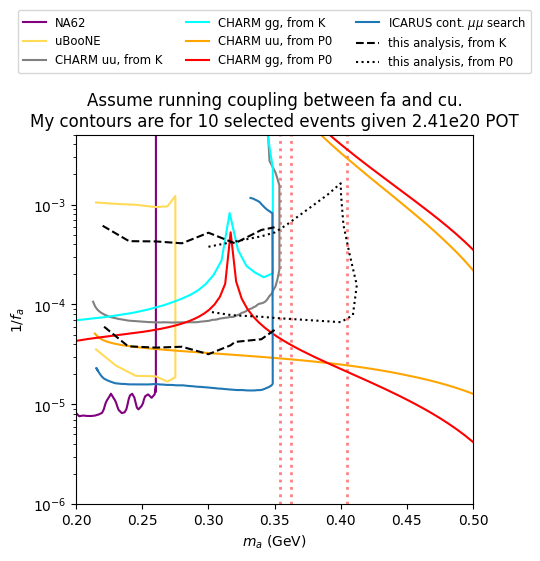

klong_mass-pizero_mass:  0.3626342
kplus_mass-piplus_mass:  0.35410661
3*pizero_mass:  0.4049304


In [54]:
# Contour for 10 selected events.
# Combine both production modes for the masses generated with mixing. 
## Note: I don't currently have 350 MeV HPS, so fudge that one.

fig = plt.figure()
ax = plt.subplot(111)
plt.rcParams['text.usetex'] = False

myalpha = 0.5
mylinestyle = ':'
plt.axvline([klong_mass-pizero_mass], linestyle=mylinestyle, color="r", linewidth=2, alpha=myalpha) # where kaon-decay production mode becomes impossible.
plt.axvline([kplus_mass-piplus_mass], linestyle=mylinestyle, color="r", linewidth=2, alpha=myalpha) # where kaon-decay production mode becomes impossible.
plt.axvline([0.548], linestyle=mylinestyle, color="r", linewidth=2, alpha=myalpha) # eta mass
plt.axvline([3*pizero_mass], linestyle=mylinestyle, color="r", linewidth=2, alpha=myalpha) # axion mass where hadronic decays start to matter

# Other limits:

plt.plot(NA62_x, NA62_y, color='purple', label='NA62') # 
plt.plot(uB_x, uB_y, color='#FFDB58', label='uBooNE') # 
plt.plot(charm_uu_x, charm_uu_y, color='gray', label='CHARM uu, from K')
plt.plot(charm_gg_x, charm_gg_y, color='cyan', label='CHARM gg, from K')
#plt.plot(charmP0_uu_x, charmP0_uu_y, color='orange', label='CHARM uu, from P0')
plt.plot(charmP0_uu_x_1, charmP0_uu_y_1, color='orange', label='CHARM uu, from P0')
plt.plot(charmP0_uu_x_2, charmP0_uu_y_2, color='orange')
#plt.plot(charmP0_gg_x, charmP0_gg_y, color='red', label='CHARM gg, from P0')
plt.plot(charmP0_gg_x_1, charmP0_gg_y_1, color='red', label='CHARM gg, from P0')
plt.plot(charmP0_gg_x_2, charmP0_gg_y_2, color='red')

plt.plot(Gray_x/1000., Gray_y, label='ICARUS cont. $\mu\mu$ search', color='C0')

# MY LIMITS:

mycolor = 'black' # '#FF69B4' # Hot Pink

# both production modes:
##    For now just say selection rates for 350 MeV mass is same as for 300 MeV mass.
#print(Z_bothProd.shape)
#Z_bothProd
#Z_bothProd_fudge350Mev = Z_bothProd
#Z_bothProd_fudge350Mev[:,1] = Z_bothProd_fudge350Mev[:,0]
#Z_bothProd_fudge350Mev
#plt.contour(np.array(alp_nosup_masses).astype(np.float)/1000., 
#            1./np.array(Y),
#            np.log(Z_bothProd_fudge350Mev),
#            levels=[np.log(10)],
#            colors=mycolor)#, linestyles='dotted')
#plt.plot([0.6,0.7], # need this to include label for my contour in plot.
#         [1./np.array(Y)[0], 1./np.array(Y)[1]], 
#         alpha=1, color=mycolor, #, linestyle=':'
#         label='this analysis, both prod. modes*', 
#        )

# from k-decay
Z_KdecayProd_fromHPS
plt.contour(np.array(higgs_masses).astype(np.float)/1000., 
            1./np.array(Y),
            np.log(Z_KdecayProd_fromHPS),
            levels=[np.log(10)],
            colors=mycolor, linestyles='dashed')
plt.plot([0.6,0.7], # need this to include label for my contour in plot.
         [1./np.array(Y)[0], 
          1./np.array(Y)[1]], 
         alpha=1, 
         label="this analysis, from K",# \nMasses gen'ed: \n0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.35", 
         color=mycolor, 
         linestyle='--')

# from mixing
plt.contour(np.array(alp_nosup_masses).astype(np.float)/1000., 
            1./np.array(Y),
            np.log(Z_mixProd),
            levels=[np.log(10)],
            colors=mycolor, linestyles='dotted')
plt.plot([0.6,0.7], # need this to include label for my contour in plot.
         [1./np.array(Y)[0], 
          1./np.array(Y)[1]], 
         alpha=1, 
         label="this analysis, from P0",#\nMasses gen'ed: \n0.3, 0.34, 0.35, 0.4, 0.45, 0.5, 0.54, 0.6, 0.65, 0.7", 
         color=mycolor, 
         linestyle=':')

# General formatting
plt.title('Assume running coupling between fa and cu.'
          +'\nMy contours are for 10 selected events given '+POTSTR
         ) # (black) \nassuming 0% background uncertainty (pink)')
plt.yscale('log')
plt.xlabel('$m_a$ (GeV)')
plt.ylabel('$1/f_a$')#_S$')
plt.xlim((0.2, 0.5))
plt.ylim((1e-6, max(1./np.array(Y)))) # ((1e-6,2e-3)) # (min(1./np.array(Y)), max(1./np.array(Y)))
#plt.legend(loc='lower right')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize='small')
plt.show()
print('klong_mass-pizero_mass: ', klong_mass-pizero_mass)
print('kplus_mass-piplus_mass: ', kplus_mass-piplus_mass)
print('3*pizero_mass: ', 3*pizero_mass)


### make contour with CLs

In [28]:
# Analysis Model to be passed to CLs

mc_signal = 11 # should be in ballpark of number of signal events you expect to exclude with the desired exclusion limit. 
                # for statistical only, reasonable to consider S/root(B) = 2, so S=2*root(B)
    
confidence = 0.10 # Desired Confidence Level: The confidence level is 1 minus this value.

modelspec = {
  "channels": [
    {
      "name": "singlechannel",
      "samples": [
        {
          "name": "signal",
          "data": [ mc_signal ],                   
          "modifiers": [
            {"name": "mu", "type": "normfactor", "data": None },
            {"name": "uncorr_siguncrt", "type": "shapesys", "data": [mc_signal*0.8]}
          ]
        },
        {
          "name": "background",
          "data": [ total_selected_bg ],       # total_selected_bg           
          "modifiers": [
            { "name": "uncorr_bkguncrt", "type": "shapesys", "data": [total_selected_bg*0.8] }  
                                     # if equal to data, then 100% uncertainty.
                                     # TODO: put the error bar I have on the signal bin here.#       
                                     # Interesting to compare to 100% and 0% uncertainty, too.
          ]
        }
      ]
    }
  ]
}
model = pyhf.Model(modelspec)
poi_values = np.linspace(0.1, 10.0, 200)

In [29]:
# 50% assumed background uncertainty, 50% assumed signal uncertainty
obs_limit_50bgerr50sigerr, exp_limits_50bgerr50sigerr, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    [observed_data_events] + model.config.auxdata, 
    model, 
    poi_values, 
    level=confidence, 
    return_results=True) 
#print('Observed limit on # of signal events: ',obs_limit * mc_signal) # cares about data.
print('Expected limit on # of signal events: ',exp_limits_50bgerr50sigerr[2] * mc_signal)
print('One sigma high expectation: ',exp_limits_50bgerr50sigerr[3] * mc_signal)
print('One sigma low expectation:  ',exp_limits_50bgerr50sigerr[1] * mc_signal)
print('Two sigma high expectation: ',exp_limits_50bgerr50sigerr[4] * mc_signal)
print('Two sigma low expectation:  ',exp_limits_50bgerr50sigerr[0] * mc_signal)

/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Expected limit on # of signal events:  7.372467711630134
One sigma high expectation:  23.84495164704594
One sigma low expectation:   3.4697035654716983
Two sigma high expectation:  110.0
Two sigma low expectation:   2.107578968077142


/tmp/ipykernel_1715608/1119938566.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(alp_nosup_masses).astype(np.float)/1000.
/tmp/ipykernel_1715608/1119938566.py:35: RuntimeWarning: divide by zero encountered in log
  plt.contourf(X, 1./np.array(Y), np.log(Z_mixProd), levels=[np.log(exp_limits_50bgerr50sigerr[0]*mc_signal),np.log(exp_limits_50bgerr50sigerr[4]*mc_signal)],colors=mycolor, alpha=0.2)
/tmp/ipykernel_1715608/1119938566.py:36: RuntimeWarning: divide by zero encountered in log
  plt.contourf(X, 1./np.array(Y), np.log(Z_mixProd), levels=[np.log(exp_limits_50bgerr50sigerr[1]*mc_signal),np.log(exp_limits_50bgerr50sigerr[3]*mc_signal)],colo

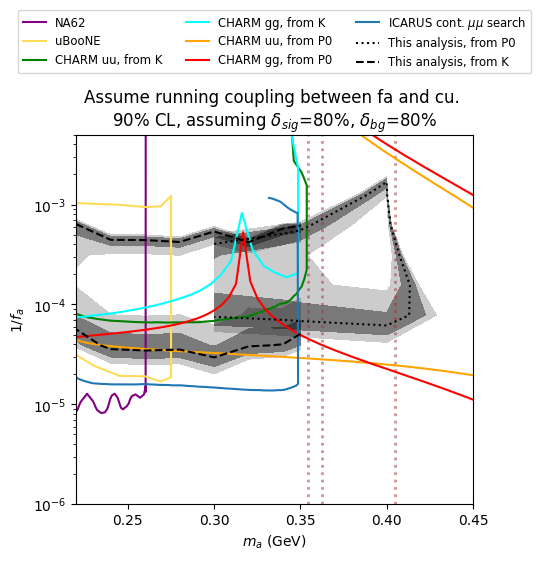

klong_mass-pizero_mass:  0.3626342
kplus_mass-piplus_mass:  0.35410661


In [60]:
# Make the plot

fig = plt.figure()
ax = plt.subplot(111)

# Vertical lines:
myalpha = 0.5
mylinestyle = ':'
vcolor = 'brown' #'r'
plt.axvline([klong_mass-pizero_mass], linestyle=mylinestyle, color=vcolor, linewidth=2, alpha=myalpha) # where kaon-decay production mode becomes impossible.
plt.axvline([kplus_mass-piplus_mass], linestyle=mylinestyle, color=vcolor, linewidth=2, alpha=myalpha) # where kaon-decay production mode becomes impossible.
plt.axvline([0.548], linestyle=mylinestyle, color=vcolor, linewidth=2, alpha=myalpha) # eta mass
plt.axvline([3*pizero_mass], linestyle=mylinestyle, color=vcolor, linewidth=2, alpha=myalpha) # axion mass where hadronic decays start to matter

# Other limits:

plt.plot(NA62_x, NA62_y, color='purple', label='NA62') # 
plt.plot(uB_x, uB_y, color='#FFDB58', label='uBooNE') # 
plt.plot(charm_uu_x, charm_uu_y, color='green', label='CHARM uu, from K')
plt.plot(charm_gg_x, charm_gg_y, color='cyan', label='CHARM gg, from K')
#plt.plot(charmP0_uu_x, charmP0_uu_y, color='orange', label='CHARM uu, from P0')
plt.plot(charmP0_uu_x_1, charmP0_uu_y_1, color='orange', label='CHARM uu, from P0')
plt.plot(charmP0_uu_x_2, charmP0_uu_y_2, color='orange')
#plt.plot(charmP0_gg_x, charmP0_gg_y, color='red', label='CHARM gg, from P0')
plt.plot(charmP0_gg_x_1, charmP0_gg_y_1, color='red', label='CHARM gg, from P0')
plt.plot(charmP0_gg_x_2, charmP0_gg_y_2, color='red')
plt.plot(Gray_x/1000., Gray_y, label='ICARUS cont. $\mu\mu$ search', color='C0')

# MY LIMITS:

mycolor = 'black' # '#FF69B4' # Hot Pink

# from mixing
X = np.array(alp_nosup_masses).astype(np.float)/1000.
plt.contourf(X, 1./np.array(Y), np.log(Z_mixProd), levels=[np.log(exp_limits_50bgerr50sigerr[0]*mc_signal),np.log(exp_limits_50bgerr50sigerr[4]*mc_signal)],colors=mycolor, alpha=0.2)
plt.contourf(X, 1./np.array(Y), np.log(Z_mixProd), levels=[np.log(exp_limits_50bgerr50sigerr[1]*mc_signal),np.log(exp_limits_50bgerr50sigerr[3]*mc_signal)],colors=mycolor, alpha=0.4)
plt.contour(X, 1./np.array(Y), np.log(Z_mixProd), levels=[np.log(exp_limits_50bgerr50sigerr[2]*mc_signal)],colors=mycolor, linestyles='dotted')
plt.plot([X[0], X[1]],[1,2], label="This analysis, from P0", color='black', linestyle=':', alpha=1)
# label="This analysis, from mixing.\nMasses gen'ed: 0.3, 0.35, 0.4, 0.45, 0.5"

# from k-decay
X = np.array(higgs_masses).astype(np.float)/1000.
plt.contourf(X, 1./np.array(Y), np.log(Z_KdecayProd_fromHPS), levels=[np.log(exp_limits_50bgerr50sigerr[0]*mc_signal),np.log(exp_limits_50bgerr50sigerr[4]*mc_signal)],colors=mycolor, alpha=0.2)
plt.contourf(X, 1./np.array(Y), np.log(Z_KdecayProd_fromHPS), levels=[np.log(exp_limits_50bgerr50sigerr[1]*mc_signal),np.log(exp_limits_50bgerr50sigerr[3]*mc_signal)],colors=mycolor, alpha=0.4)
plt.contour(X, 1./np.array(Y), np.log(Z_KdecayProd_fromHPS), levels=[np.log(exp_limits_50bgerr50sigerr[2]*mc_signal)],colors=mycolor, linestyles='dashed')
plt.plot([X[0], X[1]],[1,2], label="This analysis, from K", color='black', linestyle='--', alpha=1)
label="This analysis, from Kaon decay. \nMasses gen'ed: 0.22, 0.24, 0.26, 0.28, 0.3, 0.34"

# General formatting
plt.title('Assume running coupling between fa and cu. \n90% CL, assuming $\\delta_{sig}$=80%, $\\delta_{bg}$=80%')
          
          #80% unc. on signal & background') # (black) 

#plt.title('Assume running coupling between fa and cu.'
#          +'\nMy contours are for 10 selected events given '+POTSTR
#          #+ '.\n Considering both production modes for masses 300, 400, 450, 500 MeV.'+ 
#          #'\n*Here, I have fudged the 350 MeV benchmark to be the same as 300 MeV, '+
#          #'\nsince dont currently have kaon prod. mode for that benchmark.'
#         ) # (black) \nassuming 0% background uncertainty (pink)')
plt.yscale('log')
plt.xlabel('$m_a$ (GeV)')
plt.ylabel('$1/f_a$')#_S$')
plt.xlim((0.22, 0.45))
plt.ylim((1e-6, max(1./np.array(Y))))
#plt.legend(loc='lower right')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize='small')
plt.show()
print('klong_mass-pizero_mass: ', klong_mass-pizero_mass)
print('kplus_mass-piplus_mass: ', kplus_mass-piplus_mass)


# Fixed c_mu: 1/100

### Existing limits

In [63]:
print(higgs_masses)
print(type(higgs_masses[0]))


[220, 240, 260, 280, 300, 320, 340, 350]
<class 'int'>


### Make contours

In [83]:
# Keep simple: reuse the same fa values as before.

filename = 'alp_cu_1o100/alps_selRate_grid' # selRate = selection rate.

X = np.array(alp_nosup_masses).astype(np.float)/1000. # alp masses to scan over, in GeV
print(X)
running_cmu_codominance_file = '/exp/icarus/data/users/jdyer/muon_selection/tabulated_running_alp_cmu_vals_fromJosh/cl_c3_1_c12_1.csv' 
Y = [] # fa values
fa_strings = []
with open(running_cmu_codominance_file, 'r') as file:
    for line in file: 
        fa, cl = line.strip().split(',')
        Y.append(float(fa))

[0.3  0.35 0.4  0.45 0.5 ]


/tmp/ipykernel_186234/2640781528.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(alp_nosup_masses).astype(np.float)/1000. # alp masses to scan over, in GeV


In [ ]:
print(contour_dir)

In [82]:
# 1/100.
        
# GET Z VALUES FOR THE GRID, FOR MIXING-GENERATED ALP MASSES
        
# Calculate the expected event rates for the grid, and save:
Z = [expected_alp_events(m, fa, 1/100.) for fa in Y for m in X]
Z = np.array(Z)
np.save(contour_dir+filename, Z)

## Read in pre-saved expected event rates for the grid:
#print(contour_dir+'alp_cu_1o100/'+filename, Z.npy')
#Z = np.load(contour_dir+'alp_cu_1o100/'+filename, Z.npy')

Z_inds = np.arange(len(Z))
Z_outputs_per_mass = []
Z_mixProd = []
Z_KdecayProd = []
Z_bothProd = []
for nm in range(len(X)):
    Z_of_this_mass = Z[ np.where(Z_inds%len(X) == nm) ]
    Z_outputs_per_mass.append( Z_of_this_mass )
    Z_mixProd.append(Z_of_this_mass[:,0])
    Z_KdecayProd.append(Z_of_this_mass[:,1])
    Z_bothProd.append(Z_of_this_mass[:,2])
Z_mixProd = np.transpose( np.array(Z_mixProd) )
Z_KdecayProd = np.transpose( np.array(Z_KdecayProd) )
Z_bothProd = np.transpose( np.array(Z_bothProd) )

# REPEAT USING THE SELECTED HPSs:

XfromHPS = np.array(higgs_masses).astype(np.float)/1000. # alp masses to scan over, in GeV

# Calculate the expected event rates for the grid, and save:
ZfromHPS = [expected_alp_events(m, pair[0], pair[1]) for pair in fa_and_running_cmu_pairs_codominance for m in XfromHPS]
ZfromHPS = np.array(ZfromHPS)
np.save(contour_dir'+filename+'_fromHPS', ZfromHPS)

## Read in pre-saved expected event rates for the grid:
#print(contour_dir+'alp_cu_1o100/'+filename+'_fromHPS.npy')
#ZfromHPS = np.load(contour_dir+'alp_cu_1o100/'+filename+'_fromHPS.npy')

Z_inds_fromHPS = np.arange(len(ZfromHPS))
Z_outputs_per_mass_fromHPS = []
Z_mixProd_fromHPS = []
Z_KdecayProd_fromHPS = []
Z_bothProd_fromHPS = []
for nm in range(len(XfromHPS)):
    Z_of_this_mass = ZfromHPS[ np.where(Z_inds_fromHPS%len(XfromHPS) == nm) ]
    Z_outputs_per_mass_fromHPS.append( Z_of_this_mass )
    Z_mixProd_fromHPS.append(Z_of_this_mass[:,0])
    Z_KdecayProd_fromHPS.append(Z_of_this_mass[:,1])
    Z_bothProd_fromHPS.append(Z_of_this_mass[:,2])
Z_mixProd_fromHPS = np.transpose( np.array(Z_mixProd_fromHPS) )
Z_KdecayProd_fromHPS = np.transpose( np.array(Z_KdecayProd_fromHPS) )
Z_bothProd_fromHPS = np.transpose( np.array(Z_bothProd_fromHPS) )

/tmp/ipykernel_186234/590333874.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(alp_nosup_masses).astype(np.float)/1000. # alp masses to scan over, in GeV


[0.3  0.35 0.4  0.45 0.5 ]
input mass: 0.35 0.3626342
Production via kaon decay IS possible, but we did not generate HPSs at the desired alp mass, so we cannot perform the needed rescaling.
input mass: 0.35 0.3626342
Production via kaon decay IS possible, but we did not generate HPSs at the desired alp mass, so we cannot perform the needed rescaling.
input mass: 0.35 0.3626342
Production via kaon decay IS possible, but we did not generate HPSs at the desired alp mass, so we cannot perform the needed rescaling.
input mass: 0.35 0.3626342
Production via kaon decay IS possible, but we did not generate HPSs at the desired alp mass, so we cannot perform the needed rescaling.
input mass: 0.35 0.3626342
Production via kaon decay IS possible, but we did not generate HPSs at the desired alp mass, so we cannot perform the needed rescaling.
input mass: 0.35 0.3626342
Production via kaon decay IS possible, but we did not generate HPSs at the desired alp mass, so we cannot perform the needed rescal

/tmp/ipykernel_186234/590333874.py:48: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XfromHPS = np.array(higgs_masses).astype(np.float)/1000. # alp masses to scan over, in GeV


We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs

We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs -> ALPs because we did not generate meson-mixing-produced ALPs at the mass you are requesting.
We cannot perform a reweighting from ALPs

In [85]:
Z_mixProd

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [8.81542449e-123, 8.47544118e-183, 2.56273005e-307,
        0.00000000e+000, 0.00000000e+000],
       [1.45488789e-029, 1.78710771e-044, 1.36884181e-075,
        5.74843242e-091, 1.43974846e-275],
       [3.98862007e-007, 1.04453867e-010, 2.26880032e-018,
        5.24285570e-022, 7.65503190e-068],
       [3.51370868e-002, 5.56651354e-003, 1.34040939e-004,
        1.57499158e-005, 2.22538948e-016],
       [1.62994223e+000, 9.89518784e-001, 6.21490517e-001,
        3.02983084e-001, 3.71939426e-004],
       [3.19909392e+000, 3.30434159e+000, 3.47739217e+000,
        4.30058177e+000, 4.97520132e-001],
       [6.07771708e-001, 7.74267796e-001, 9.67627522e-001,
        1.78290373e+000

(19, 5)


/tmp/ipykernel_186234/1091065633.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.contour(np.array(alp_nosup_masses).astype(np.float)/1000.,
/tmp/ipykernel_186234/1091065633.py:40: RuntimeWarning: divide by zero encountered in log
  np.log(Z_mixProd),
/tmp/ipykernel_186234/1091065633.py:38: UserWarning: No contour levels were found within the data range.
  plt.contour(np.array(alp_nosup_masses).astype(np.float)/1000.,
/tmp/ipykernel_186234/1091065633.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically w

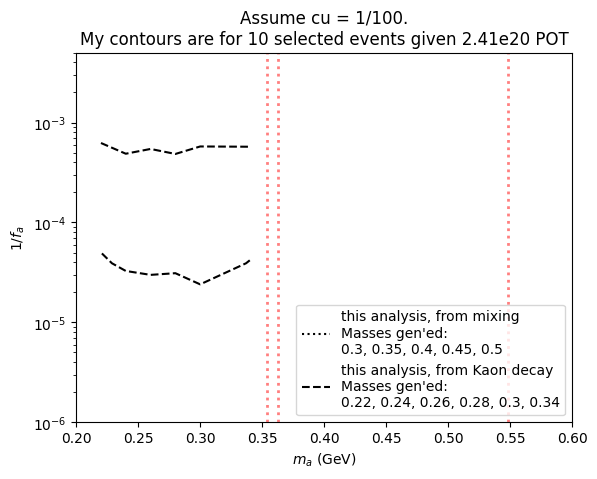

klong_mass-pizero_mass:  0.3626342
kplus_mass-piplus_mass:  0.35410661


In [84]:
# Contour for 10 selected events.
# Combine both production modes for the masses generated with mixing. 
# Note: I don't currently have 350 MeV HPS, so fudge that one.

plt.rcParams['text.usetex'] = False

myalpha = 0.5
mylinestyle = ':'
plt.axvline([klong_mass-pizero_mass], linestyle=mylinestyle, color="r", linewidth=2, alpha=myalpha) # where kaon-decay production mode becomes impossible.
plt.axvline([kplus_mass-piplus_mass], linestyle=mylinestyle, color="r", linewidth=2, alpha=myalpha) # where kaon-decay production mode becomes impossible.
plt.axvline([0.548], linestyle=mylinestyle, color="r", linewidth=2, alpha=myalpha) # eta mass

# Other limits:

# MY LIMITS:

mycolor = 'black' # '#FF69B4' # Hot Pink

# from mixing
plt.contour(np.array(alp_nosup_masses).astype(np.float)/1000., 
            1./np.array(Y),
            np.log(Z_mixProd),
            levels=[np.log(10)],
            colors=mycolor, linestyles='dotted')
plt.plot([0.6,0.7], # need this to include label for my contour in plot.
         [1./np.array(Y)[0], 
          1./np.array(Y)[1]], 
         alpha=1, 
         label="this analysis, from mixing\nMasses gen'ed: \n0.3, 0.35, 0.4, 0.45, 0.5", 
         color=mycolor, 
         linestyle=':')

# from k-decay
Z_KdecayProd_fromHPS
plt.contour(np.array(higgs_masses).astype(np.float)/1000., 
            1./np.array(Y),
            np.log(Z_KdecayProd_fromHPS),
            levels=[np.log(10)],
            colors=mycolor, linestyles='dashed')
plt.plot([0.6,0.7], # need this to include label for my contour in plot.
         [1./np.array(Y)[0], 
          1./np.array(Y)[1]], 
         alpha=1, 
         label="this analysis, from Kaon decay \nMasses gen'ed: \n0.22, 0.24, 0.26, 0.28, 0.3, 0.34", 
         color=mycolor, 
         linestyle='--')

# General formatting
plt.title('Assume cu = 1/100.'
          +'\nMy contours are for 10 selected events given '+POTSTR
          #+ '.\n Considering both production modes for masses 300, 400, 450, 500 MeV.'+ 
          #'\n*Here, I have fudged the 350 MeV benchmark to be the same as 300 MeV, '+
          #'\nsince dont currently have kaon prod. mode for that benchmark.'
         ) # (black) \nassuming 0% background uncertainty (pink)')
plt.yscale('log')
plt.xlabel('$m_a$ (GeV)')
plt.ylabel('$1/f_a$')#_S$')
plt.legend(loc='lower right')
plt.xlim((0.2, 0.6))
#plt.xlim((220, 300))
plt.ylim((1e-6, max(1./np.array(Y)))) # ((1e-6,2e-3)) # (min(1./np.array(Y)), max(1./np.array(Y)))
plt.show()
print('klong_mass-pizero_mass: ', klong_mass-pizero_mass)
print('kplus_mass-piplus_mass: ', kplus_mass-piplus_mass)
